In [ ]:
!pip install scikit-plot

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
# need something above
import pandas as pd
import numpy as np

import sklearn.metrics as metrics
import seaborn as sns
from matplotlib import style, rcParams
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#sns.use('seaborn-white')
rcParams['figure.figsize'] = 10, 6
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('emotions.csv', delimiter=',' , names = ['text','label'])
df.head()

,text,label
0,That game hurt.,sadness
1,Man I love reddit.,love
2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,Right? Considering itâs such an important do...,gratitude
4,"He isn't as big, but he's still quite popular....",disapproval


In [ ]:
print("Shape of the datframe: ", df.shape)

Shape of the datframe:  (67206, 2)


In [ ]:
df['label'].unique
df

,text,label
0,That game hurt.,sadness
1,Man I love reddit.,love
2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,Right? Considering itâs such an important do...,gratitude
4,"He isn't as big, but he's still quite popular....",disapproval
...,...,...
67201,"Before we continue, I would first like to ask ...",neutral
67202,This is great! Can anyone make a request with ...,admiration
67203,Iâm sorry. Can you please explain what are t...,curiosity
67204,No but it should be,neutral


In [ ]:
df[df.duplicated(subset=['label'], keep=False)]

,text,label
0,That game hurt.,sadness
1,Man I love reddit.,love
2,"[NAME] was nowhere near them, he was by the Fa...",neutral
3,Right? Considering itâs such an important do...,gratitude
4,"He isn't as big, but he's still quite popular....",disapproval
...,...,...
67201,"Before we continue, I would first like to ask ...",neutral
67202,This is great! Can anyone make a request with ...,admiration
67203,Iâm sorry. Can you please explain what are t...,curiosity
67204,No but it should be,neutral


In [ ]:
def customEncoder(df):
    # Positive emotions
    df.replace(to_replace="love", value=1, inplace=True)
    df.replace(to_replace="gratitude", value=1, inplace=True)
    df.replace(to_replace="admiration", value=1, inplace=True)
    df.replace(to_replace="curiosity", value=1, inplace=True)
    df.replace(to_replace="amusement", value=1, inplace=True)
    df.replace(to_replace="realization", value=1, inplace=True)
    df.replace(to_replace="joy", value=1, inplace=True)
    df.replace(to_replace="optimism", value=1, inplace=True)
    df.replace(to_replace="caring", value=1, inplace=True)
    df.replace(to_replace="pride", value=1, inplace=True)
    df.replace(to_replace="excitement", value=1, inplace=True)
    df.replace(to_replace="relief", value=1, inplace=True)
    df.replace(to_replace="approval", value=1, inplace=True)
    df.replace(to_replace="surprise", value=1, inplace=True)

    # Negative emotions
    df.replace(to_replace="sadness", value=0, inplace=True)
    df.replace(to_replace="disapproval", value=0, inplace=True)
    df.replace(to_replace="disappointment", value=0, inplace=True)
    df.replace(to_replace="annoyance", value=0, inplace=True)
    df.replace(to_replace="confusion", value=0, inplace=True)
    df.replace(to_replace="disgust", value=0, inplace=True)
    df.replace(to_replace="remorse", value=0, inplace=True)
    df.replace(to_replace="embarrassment", value=0, inplace=True)
    df.replace(to_replace="anger", value=0, inplace=True)
    df.replace(to_replace="grief", value=0, inplace=True)
    df.replace(to_replace="desire", value=0, inplace=True)
    df.replace(to_replace="fear", value=0, inplace=True)
    df.replace(to_replace="nervousness", value=0, inplace=True)
    df.replace(to_replace="neutral", value=0, inplace=True)


In [ ]:
customEncoder(df['label']) # execute the label encoder for the datser

In [ ]:
#result is dataset  with binary class label

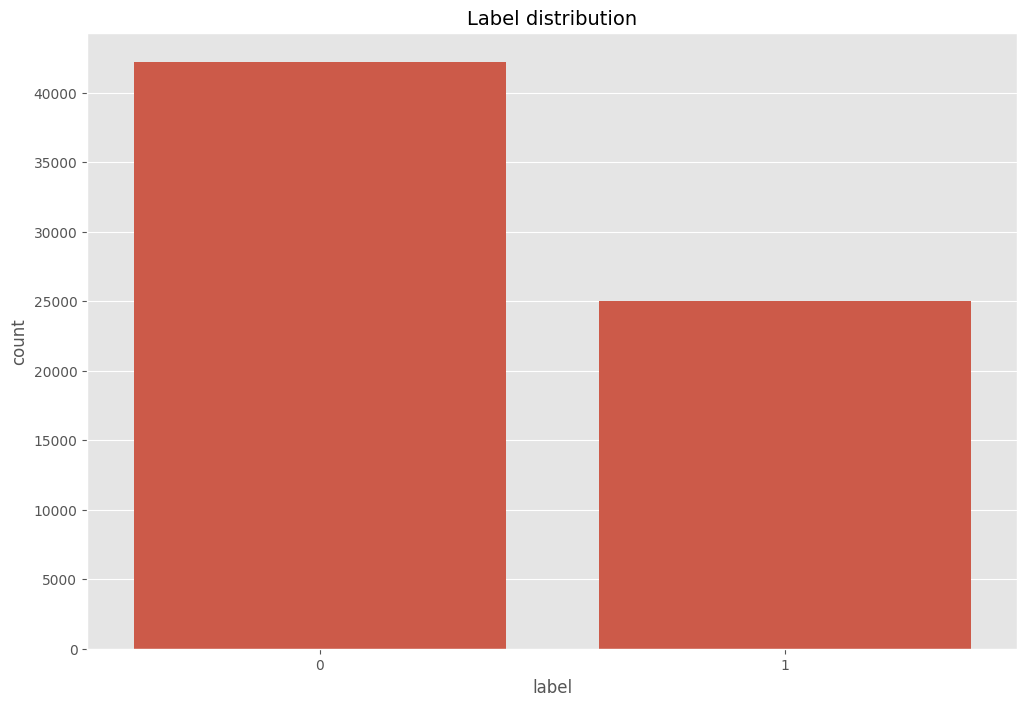

In [ ]:
from tkinter import font
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.countplot(x='label', data=df)
plt.title('Label distribution',fontsize=14)
plt.show()

In [ ]:
df.head()

,text,label
0,That game hurt.,0
1,Man I love reddit.,1
2,"[NAME] was nowhere near them, he was by the Fa...",0
3,Right? Considering itâs such an important do...,1
4,"He isn't as big, but he's still quite popular....",0


In [ ]:
lm = WordNetLemmatizer()

In [ ]:
def textTransformation(df_col):
  corpus=[]
  for item in df_col:
    #removes the puncuation charachters
    new_item=re.sub('[^a-zA-Z]',' ',str(item))
    #convert to lower case
    new_item=new_item.lower()
    #split to array(default delimiter is " ")
    new_item=new_item.split()
    #lemmatize and remove stop words.
    new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
    #convert array back to string
    corpus.append(' '.join(str(x)for x in new_item))
  return corpus

In [ ]:
# Assign transfomred text to the corpus
import nltk
nltk.download('omw-1.4')
corpus = textTransformation(df['text'])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Create a word cloud to show word density
plt.figure(figsize = (20, 8)) # Set figsize for plot
wordCloud = ""
for row in corpus:
  for word in row:
    wordCloud += " ".join(word)

myWordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(wordCloud)
plt.imshow(myWordcloud, interpolation='nearest')

# The code provided was
# wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white', min_font_size = 10).generate(wordCloud)
# plt.imshow(wordcloud)

In [ ]:
# Import CountVetorizer to cate a Bag of Words model
# This assists in determining the number of times each word appears
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Ceate a bigram with range (1,2) to permit dual word combo
cv = CountVectorizer(ngram_range=(1,2))
data = cv.fit_transform(corpus)

In [ ]:
# Assign X and y
X = data
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.5, random_state = 1)


In [ ]:
# Create logit
model = LogisticRegression(max_iter = xTrain.shape[1])
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

In [ ]:
# Evaluate performance
accuracy_score(yTest, yPred)

In [ ]:
xTest, yTest = df.text, df.label
# encode the labels into two classes, 0 and 1
df = customEncoder(yTest)
# pre-processing of text
testCorpus = text_transformation(xTest)
# convert text data into vectors
testdata = cv.transform(testCorpus)
# predict the target
predictions = model.predict(testdata)

In [1]:
# Load test data
testDf = pd.read_csv('test.csv', delimiter=',' , names = ['text','label'])
testDf

NameError: name 'pd' is not defined

In [2]:
def expressionCheck(predictionInput):
  if predictionInput == 0:
    print("Input statement has negative sentiment")
  elif predictionInput == 1:
    print("Input statement has positive sentiment")
  else:
    print("Invalid statement")

In [3]:
def sentimentPredictor(input):
  input = textTransformation(input)
  input = cv.transform(input)
  prediction = model.predict(input)
  expressionCheck(prediction)

In [ ]:
input1 = ["I am so happy about my life"]
input2 = ["I'm so miserable"]
sentimentPredictor(input1)
sentimentPredictor(input2)